# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#Installed using pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
#Create URL with API
#Temperature Units
units = "imperial"
#URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=830d535e54a6eb5130efb5827e5bd130&units=imperial&q='

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# set lists for the dataframe
city_name = []
cloudy = []
dates = []
humidity = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudy.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_name.append(city)
        else:
            count_one += 1
            city_name.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("Skipping, city was not found")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | busselton
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | buraydah
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | tongchuan
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | dondo
Skipping, city was not found
Processing Record 10 of Set 1 | suntar
Processing Record 11 of Set 1 | bonthe
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | lata
Processing Record 15 of Set 1 | bluff
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | dikson
Processing Record 23 of Set 1 | yellowknife
Processing Record 24 of Set 1 | tasiilaq
Processing R

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create Dictionary
weather = ({"City": city_name,
            "Cloudiness": cloudy,
            "Country": countries,
            "Date": dates,
            "Humidity": humidity,
            "Lat": lats,
            "Lng": lngs,
            "Max Temp": max_temps,
            "Wind Speed": wind_speeds
           })
#Create DF
weather_df = pd.DataFrame(weather)
#Print DF
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,0,AR,1651975683,43,-54.8000,-68.3000,47.86,16.11
1,busselton,47,AU,1651975779,60,-33.6500,115.3333,66.11,5.14
2,port alfred,99,ZA,1651975744,87,-33.5906,26.8910,57.18,4.00
3,buraydah,3,SA,1651975936,23,26.3260,43.9750,70.81,11.41
4,nikolskoye,100,RU,1651975936,94,59.7035,30.7861,44.87,7.63
...,...,...,...,...,...,...,...,...,...
559,tignere,100,CM,1651976171,87,7.3667,12.6500,66.00,1.83
560,luanda,75,AO,1651976171,94,-8.8368,13.2343,77.00,10.36
561,launceston,4,AU,1651976172,55,-41.4500,147.1667,64.62,4.61
562,machico,20,PT,1651976172,65,32.7000,-16.7667,64.71,19.57


In [7]:
#Export DF to CSV
weather_df.to_csv("weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
greater_humidity = weather_df.query("Humidity > 100")
greater_humidity

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

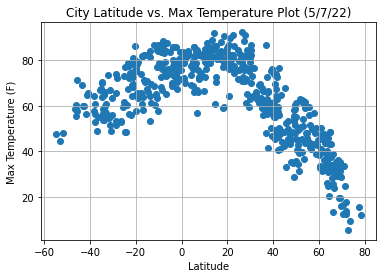

In [17]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"])
plt.title("City Latitude vs. Max Temperature Plot (5/7/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Figures/fig1.png")
plt.show()

## Latitude vs. Humidity Plot

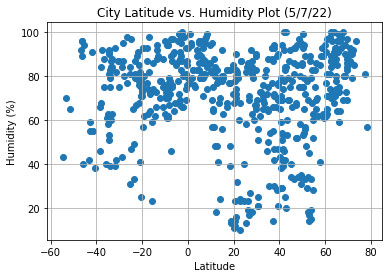

In [18]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"])
plt.title("City Latitude vs. Humidity Plot (5/7/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Figures/fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

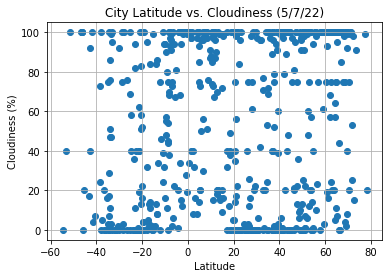

In [20]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (5/7/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Figures/fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

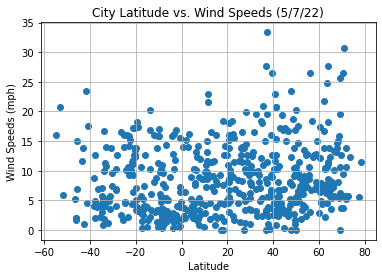

In [21]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"])
plt.title("City Latitude vs. Wind Speeds (5/7/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds (mph)")
plt.grid (b=True,which="major",axis="both")
plt.savefig("Figures/fig4.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression